In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import copy

font_path = "C:/Windows/Fonts/MALGUN.TTF"
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)
plt.rc('xtick', labelsize=10)
mpl.rcParams['axes.unicode_minus'] = False

In [2]:
train = pd.read_csv("../data/dacon_parking_demand_dataset/train.csv")
test = pd.read_csv("../data/dacon_parking_demand_dataset/test.csv")
sub = pd.read_csv("../data/dacon_parking_demand_dataset/test.csv")
age = pd.read_csv("../data/dacon_parking_demand_dataset/age_gender_info.csv")

In [3]:
train.shape, test.shape

((2952, 15), (1022, 14))

In [4]:
# 오류1번 트레인 셋 처리
# 총세대수와 전용면적별 세대수 합이 다른 단지코드의 값을 -> 전용면적별세대수의 합으로 수정하기

def house_number_correction(df):
    error_1_group = df.groupby("단지코드")[["총세대수"]]
    total_number_house_hold = error_1_group.mean()

    error_2_group = df.groupby("단지코드")["전용면적별세대수"]
    sum_house_hold = error_2_group.sum()

    check_df = pd.concat([total_number_house_hold, sum_house_hold], axis=1)
    different_df = check_df[check_df["총세대수"] != check_df["전용면적별세대수"]]

    total_house_index = different_df.index
    total_house_number = []
    for v in different_df.values:
        total_house_number.append(v[1])
    
    for code, value in zip(total_house_index, total_house_number):
         df.loc[df["단지코드"] == code, "총세대수"] = value
    
    return df

train = house_number_correction(train)
test = house_number_correction(test)

In [5]:
error_1_group = train.groupby("단지코드")[["총세대수"]]
total_number_house_hold = error_1_group.mean()

error_2_group = train.groupby("단지코드")["전용면적별세대수"]
sum_house_hold = error_2_group.sum()

check_df = pd.concat([total_number_house_hold, sum_house_hold], axis=1)
check_df = check_df[check_df["총세대수"] != check_df["전용면적별세대수"]]

print(check_df.shape)
check_df

(0, 2)


,총세대수,전용면적별세대수
단지코드,,


In [6]:
error_1_group = test.groupby("단지코드")[["총세대수"]]
total_number_house_hold = error_1_group.mean()

error_2_group = test.groupby("단지코드")["전용면적별세대수"]
sum_house_hold = error_2_group.sum()

check_df = pd.concat([total_number_house_hold, sum_house_hold], axis=1)
check_df = check_df[check_df["총세대수"] != check_df["전용면적별세대수"]]

check_df.shape

(0, 2)

In [7]:
# 오류2번 3번 처리하기

train[(train["단지코드"] == "C2675") | (train["단지코드"] == "C2335") | (train["단지코드"] == "C1327")]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수


In [8]:
test[(test["단지코드"] == "C2675") | (test["단지코드"] == "C2335") | (test["단지코드"] == "C1327")].head(3)

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
579,C2675,512,아파트,경기도,국민임대,36.65,130,9.0,A,18476000,154790,0.0,3.0,1016.0
580,C2675,512,아파트,경기도,국민임대,46.90,44,9.0,A,34082000,232200,0.0,3.0,1016.0
581,C2675,512,아파트,경기도,국민임대,46.90,80,9.0,A,34082000,232200,0.0,3.0,1016.0


In [9]:
# 테스트 데이터 셋에서 세개의 코드 데이터를 없애기 (2, 3번 3개 코드 제거)

error_index = test[(test["단지코드"] == "C2675") | (test["단지코드"] == "C2335") | (test["단지코드"] == "C1327")].index
test = test.drop(index=error_index, axis=0)

In [10]:
# 에러2번의 5개 단지코드 트레인 셋 제거

train_set_error_index = train[(train["단지코드"] =="C2085") | (train["단지코드"] =="C1397") | (train["단지코드"] =="C2431") | (train["단지코드"] =="C1649") | (train["단지코드"] =="C1036")].index
train = train.drop(index=train_set_error_index, axis=0)

In [11]:
# 에러3번의 트레인 셋 7개 단지 코드 제거

train_set_error_index = train[(train["단지코드"] =="C1095") | (train["단지코드"] =="C2051") | (train["단지코드"] =="C1218") | (train["단지코드"] =="C1894") | (train["단지코드"] =="C2483") | (train["단지코드"] =="C1502") | (train["단지코드"] =="C1988")].index
train = train.drop(index=train_set_error_index, axis=0)

In [12]:
# 자격 유형 피처 전처리

test.loc[196, "자격유형"] = "A"
test.loc[258, "자격유형"] = "C"
test.isnull().sum()

단지코드                              0
총세대수                              0
임대건물구분                            0
지역                                0
공급유형                              0
전용면적                              0
전용면적별세대수                          0
공가수                               0
자격유형                              0
임대보증금                           180
임대료                             180
도보 10분거리 내 지하철역 수(환승노선 수 반영)     38
도보 10분거리 내 버스정류장 수                0
단지내주차면수                           0
dtype: int64

In [13]:
train.isnull().sum()

단지코드                              0
총세대수                              0
임대건물구분                            0
지역                                0
공급유형                              0
전용면적                              0
전용면적별세대수                          0
공가수                               0
자격유형                              0
임대보증금                           569
임대료                             569
도보 10분거리 내 지하철역 수(환승노선 수 반영)    207
도보 10분거리 내 버스정류장 수                0
단지내주차면수                           0
등록차량수                             0
dtype: int64

In [14]:
# 임대보증금 피처 전처리

train_df = train.copy(deep=True)
test_df = test.copy(deep=True)

train_df["임대보증금"] = train_df["임대보증금"].fillna(0)
train_df.loc[train_df["임대보증금"] == "-", "임대보증금"] = 0
train_df["임대보증금"] = train_df["임대보증금"].astype(int)

test_df["임대보증금"] = test_df["임대보증금"].fillna(0)
test_df.loc[test_df["임대보증금"] == "-", "임대보증금"] = 0
test_df["임대보증금"] = test_df["임대보증금"].astype(int)

In [15]:
# 레이블 인코딩인데, 원핫 인코딩으로 바꿔보기

qualification_type_feature = pd.get_dummies(train_df["자격유형"])
train_df = pd.concat([train_df, qualification_type_feature], axis=1)

qualification_type_feature = pd.get_dummies(test_df["자격유형"])
test_df = pd.concat([test_df, qualification_type_feature], axis=1)

test_df["B"] = 0
test_df["F"] = 0
test_df["O"] = 0

In [16]:
train_df.shape, test_df.shape

((2869, 30), (1008, 29))

In [17]:
# 실거주 세대수 피처 생성
# 임대보증금이 0인 행의 데이터를 -> 트레인 셋의 중앙값으로 치환

train_df["실거주세대수"] = train_df["총세대수"] - train_df["공가수"].astype(int)
train_df.loc[train_df["임대보증금"] == 0, "임대보증금"] = train_df["임대보증금"].median()

test_df["실거주세대수"] = test_df["총세대수"] - test_df["공가수"].astype(int)
test_df.loc[test_df["임대보증금"] == 0, "임대보증금"] = train_df["임대보증금"].median()

In [18]:
# 세대수 별 주차면수 피처 생성

train_df["세대수비율주차면수"] = (train_df["전용면적별세대수"] / train_df["실거주세대수"]) * train_df["단지내주차면수"]
test_df["세대수비율주차면수"] = (test_df["전용면적별세대수"] / test_df["실거주세대수"]) * test_df["단지내주차면수"]

In [19]:
# 버스정류장 피처 전처리
# 최빈값인 2로 채우기

train_df["도보 10분거리 내 버스정류장 수"] = train_df["도보 10분거리 내 버스정류장 수"].fillna(2)
test_df["도보 10분거리 내 버스정류장 수"] = test_df["도보 10분거리 내 버스정류장 수"].fillna(2)

In [20]:
# 전철역 피처 전처리
# Null 값 0으로 채우기

train_df["도보 10분거리 내 지하철역 수(환승노선 수 반영)"] = train_df["도보 10분거리 내 지하철역 수(환승노선 수 반영)"].fillna(0)
test_df["도보 10분거리 내 지하철역 수(환승노선 수 반영)"] = test_df["도보 10분거리 내 지하철역 수(환승노선 수 반영)"].fillna(0)

<AxesSubplot:>

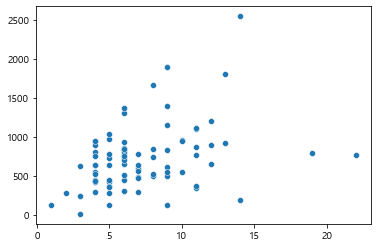

In [21]:
area_group = train_df.groupby("지역")["등록차량수"]

values = area_group.get_group("경기도").value_counts().index
counts = area_group.get_group("경기도").value_counts().values

sns.scatterplot(x=counts, y=values)

In [22]:
# 지역별 인구수 컬럼 추가

population_df = pd.read_csv("../data/dacon_parking_demand_dataset/age_gender_info.csv")
partial_population_df = population_df[["20대(남자)", "40대(남자)", "50대(여자)", "지역"]]
train_df = pd.merge(train_df, partial_population_df, on="지역")
test_df = pd.merge(test_df, partial_population_df, on="지역")

train_df.columns

Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '도보 10분거리 내 지하철역 수(환승노선 수 반영)',
       '도보 10분거리 내 버스정류장 수', '단지내주차면수', '등록차량수', 'A', 'B', 'C', 'D', 'E', 'F',
       'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', '실거주세대수', '세대수비율주차면수',
       '20대(남자)', '40대(남자)', '50대(여자)'],
      dtype='object')

In [23]:
# 지역 피처 원핫 인코딩

area_df = pd.get_dummies(train_df["지역"])
area_df = area_df.drop("서울특별시", axis=1)
train_df = pd.concat([train_df, area_df], axis=1)

area_df = pd.get_dummies(test_df["지역"])
test_df = pd.concat([test_df, area_df], axis=1)

In [24]:
# 임대건물 구분 피처 전처리 (아파트, 상가 원핫 인코딩)

train_df = pd.concat([train_df, pd.get_dummies(train_df["임대건물구분"])], axis=1)
train_df.drop("임대건물구분", axis=1, inplace=True)

test_df = pd.concat([test_df, pd.get_dummies(test_df["임대건물구분"])], axis=1)
test_df.drop("임대건물구분", axis=1, inplace=True)

In [25]:
# 전용 면적 피처를 5의 배수로 전처리, 전후로 비교해서 (103.69 -> 102.80까지 떨어짐)
train_df["전용면적"] = train_df["전용면적"] // 5*5
test_df["전용면적"] = test_df["전용면적"] // 5*5

In [26]:
# 세대수 규모 당 총 전용 면적 피처 생성

train_df["세대수 규모 당 총 전용면적"] = train_df["전용면적"] * train_df["전용면적별세대수"]
test_df["세대수 규모 당 총 전용면적"] = test_df["전용면적"] * test_df["전용면적별세대수"]

In [27]:
# 단지별 총 전용 면적 피처 생성

train_df["단지별 총 전용면적"] = train_df.groupby("단지코드")["세대수 규모 당 총 전용면적"].transform(np.sum)
test_df["단지별 총 전용면적"] = test_df.groupby("단지코드")["세대수 규모 당 총 전용면적"].transform(np.sum)

In [28]:
# 전용면적 당 차량등록수 피처 생성

train_df["전용면적 당 차량등록수"] = (train_df["세대수 규모 당 총 전용면적"] / train_df["단지별 총 전용면적"]) * train_df["등록차량수"]

In [29]:
# X_train & X_test 셋 선택

X_train_df_sel = train_df.drop(["단지코드", "지역", "공급유형", "전용면적", "자격유형", "임대료",
                                "단지내주차면수", "등록차량수", "전용면적 당 차량등록수"], axis=1)

X_test_df_sel = test_df.drop(["단지코드", "지역", "공급유형", "전용면적", "자격유형", "임대료",
                              "단지내주차면수"], axis=1)

y_train_df = train_df["전용면적 당 차량등록수"]

In [30]:
X_train_df_sel.columns

Index(['총세대수', '전용면적별세대수', '공가수', '임대보증금', '도보 10분거리 내 지하철역 수(환승노선 수 반영)',
       '도보 10분거리 내 버스정류장 수', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J',
       'K', 'L', 'M', 'N', 'O', '실거주세대수', '세대수비율주차면수', '20대(남자)', '40대(남자)',
       '50대(여자)', '강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시',
       '부산광역시', '세종특별자치시', '울산광역시', '전라남도', '전라북도', '제주특별자치도', '충청남도', '충청북도',
       '상가', '아파트', '세대수 규모 당 총 전용면적', '단지별 총 전용면적'],
      dtype='object')

In [31]:
column_names = ['총세대수', '전용면적별세대수', '공가수', '임대보증금', '도보 10분거리 내 지하철역 수(환승노선 수 반영)',
       '도보 10분거리 내 버스정류장 수', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J',
       'K', 'L', 'M', 'N', 'O', '실거주세대수', '세대수비율주차면수', '20대(남자)', '40대(남자)',
       '50대(여자)', '강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시',
       '부산광역시', '세종특별자치시', '울산광역시', '전라남도', '전라북도', '제주특별자치도', '충청남도', '충청북도',
       '상가', '아파트', '세대수 규모 당 총 전용면적', '단지별 총 전용면적']

X_test_df_sel = X_test_df_sel.reindex(columns=column_names)
X_test_df_sel.columns

Index(['총세대수', '전용면적별세대수', '공가수', '임대보증금', '도보 10분거리 내 지하철역 수(환승노선 수 반영)',
       '도보 10분거리 내 버스정류장 수', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J',
       'K', 'L', 'M', 'N', 'O', '실거주세대수', '세대수비율주차면수', '20대(남자)', '40대(남자)',
       '50대(여자)', '강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시',
       '부산광역시', '세종특별자치시', '울산광역시', '전라남도', '전라북도', '제주특별자치도', '충청남도', '충청북도',
       '상가', '아파트', '세대수 규모 당 총 전용면적', '단지별 총 전용면적'],
      dtype='object')

In [32]:
X_train_df_sel

,총세대수,전용면적별세대수,공가수,임대보증금,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,A,B,C,D,...,울산광역시,전라남도,전라북도,제주특별자치도,충청남도,충청북도,상가,아파트,세대수 규모 당 총 전용면적,단지별 총 전용면적
0,545,276,17.0,9216000.0,0.0,3.0,1,0,0,0,...,0,0,0,0,0,0,0,1,8280.0,20245.0
1,545,60,17.0,12672000.0,0.0,3.0,1,0,0,0,...,0,0,0,0,0,0,0,1,2100.0,20245.0
2,545,20,17.0,12672000.0,0.0,3.0,1,0,0,0,...,0,0,0,0,0,0,0,1,700.0,20245.0
3,545,38,17.0,18433000.0,0.0,3.0,1,0,0,0,...,0,0,0,0,0,0,0,1,1710.0,20245.0
4,545,19,17.0,18433000.0,0.0,3.0,1,0,0,0,...,0,0,0,0,0,0,0,1,855.0,20245.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2864,1080,30,7.0,39000000.0,0.0,2.0,1,0,0,0,...,0,0,0,0,0,0,0,1,1650.0,68910.0
2865,1080,156,7.0,49000000.0,0.0,2.0,1,0,0,0,...,0,0,0,0,0,0,0,1,10920.0,68910.0
2866,1080,78,7.0,49000000.0,0.0,2.0,1,0,0,0,...,0,0,0,0,0,0,0,1,5460.0,68910.0
2867,1080,160,7.0,61000000.0,0.0,2.0,1,0,0,0,...,0,0,0,0,0,0,0,1,12800.0,68910.0


In [33]:
X_train_df_sel = X_train_df_sel.apply(lambda x: np.log1p(x))
X_test_df_sel = X_test_df_sel.apply(lambda x: np.log1p(x))
y_train_df = y_train_df.apply(lambda x: np.log1p(x))

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train_df_sel)

X_train_df_scaled = scaler.transform(X_train_df_sel)
X_test_df_scaled = scaler.transform(X_test_df_sel)
X_test_df_scaled[:5]

array([[ 0.02416506,  0.63707819,  0.46686797,  0.20777201, -0.41717302,
        -0.74183078, -1.23153021, -0.08586964, -0.1850583 , -0.49738446,
        -0.11430211, -0.03235359, -0.05609682,  4.18445665, -0.13181763,
        -0.19297121, -0.10787079, -0.10787079, -0.02641199, -0.10279641,
        -0.01867284,  0.02560427,  0.68642306, -0.97934061,  1.26373617,
        -1.2041604 , -0.26405319,  1.95495492, -0.38059474, -0.20061544,
        -0.22734603, -0.19199747, -0.31967136, -0.35928128, -0.0918469 ,
        -0.10951231, -0.23238849, -0.19872784, -0.18099   , -0.24141474,
        -0.24543128, -0.49356501,  0.49356501,  0.55964121,  0.36762286],
       [ 0.02416506, -0.12746994,  0.46686797,  1.01944159, -0.41717302,
        -0.74183078,  0.81199794, -0.08586964, -0.1850583 , -0.49738446,
        -0.11430211, -0.03235359, -0.05609682, -0.23897965, -0.13181763,
        -0.19297121, -0.10787079, -0.10787079, -0.02641199, -0.10279641,
        -0.01867284,  0.02560427, -0.0316859 , -0.

### XGBoost & LightGBM & RandomForestRegressor 모델 평가

In [35]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

### 랜덤포레스트회귀 모델

In [44]:
# 최고 스코어 모델 

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1, random_state=42)
# model.fit(X_train_df_scaled, y_train_df)

# importance = model.feature_importances_
# feature_importance = pd.Series(data=importance, index=X_train_df_sel.columns)
# feature_importance = feature_importance.sort_values(ascending=False)

# plt.figure(figsize=(20, 12))
# sns.barplot(x=feature_importance, y=feature_importance.index)
# plt.show()

In [45]:
# XGBoost 모델 피처 중요도 확인

xgbr_model = XGBRegressor(n_jobs=-1, random_state=42)
# xgbr_model.fit(X_train_df_scaled, y_train_df)

# importance = xgbr_model.feature_importances_
# feature_importance = pd.Series(data=importance, index=X_train_df_sel.columns)
# feature_importance = feature_importance.sort_values(ascending=False)

# plt.figure(figsize=(20, 12))
# sns.barplot(x=feature_importance, y=feature_importance.index)
# plt.show()

In [46]:
# LightGBM 모델 피처 중요도 확인

lgbm_model = LGBMRegressor(n_jobs=-1, random_state=42)
# lgbm_model.fit(X_train_df_scaled, y_train_df)

# importance = lgbm_model.feature_importances_
# feature_importance = pd.Series(data=importance, index=X_train_df_sel.columns)
# feature_importance = feature_importance.sort_values(ascending=False)

# plt.figure(figsize=(20, 12))
# sns.barplot(x=feature_importance, y=feature_importance.index)
# plt.show()

In [47]:
lgbm_model1 = LGBMRegressor(n_jobs=-1, random_state=42, n_estimators=5000, learning_rate=0.05)
# lgbm_model1.fit(X_train_df_scaled, y_train_df)

# importance = lgbm_model1.feature_importances_
# feature_importance = pd.Series(data=importance, index=X_train_df_sel.columns)
# feature_importance = feature_importance.sort_values(ascending=False)

# plt.figure(figsize=(20, 12))
# sns.barplot(x=feature_importance, y=feature_importance.index)
# plt.show()

In [48]:
from sklearn.ensemble import GradientBoostingRegressor

gbr_model = GradientBoostingRegressor(n_estimators=5000, random_state=42)
# gbr_model.fit(X_train_df_scaled, y_train_df)

# importance = gbr_model.feature_importances_
# feature_importance = pd.Series(data=importance, index=X_train_df_sel.columns)
# feature_importance = feature_importance.sort_values(ascending=False)

# plt.figure(figsize=(20, 12))
# sns.barplot(x=feature_importance, y=feature_importance.index)
# plt.show()

In [49]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(model, X_train_df_scaled, y_train_df, cv=5, scoring="neg_mean_absolute_error")
average_score = np.abs(score.mean())
print("RandomForestRegressor Score: {:.4f}".format(average_score))

score = cross_val_score(xgbr_model, X_train_df_scaled, y_train_df, cv=5, scoring="neg_mean_absolute_error")
average_score = np.abs(score.mean())
print("XGBRegressor Score: {:.4f}".format(average_score))

score = cross_val_score(lgbm_model, X_train_df_scaled, y_train_df, cv=5, scoring="neg_mean_absolute_error")
average_score = np.abs(score.mean())
print("LightGBM Score: {:.4f}".format(average_score))

score = cross_val_score(lgbm_model1, X_train_df_scaled, y_train_df, cv=5, scoring="neg_mean_absolute_error")
average_score = np.abs(score.mean())
print("LightGBM1 Score: {:.4f}".format(average_score))

score = cross_val_score(gbr_model, X_train_df_scaled, y_train_df, cv=5, scoring="neg_mean_absolute_error")
average_score = np.abs(score.mean())
print("GradientBoosting Score: {:.4f}".format(average_score))

RandomForestRegressor Score: 0.2062
XGBRegressor Score: 0.2302
LightGBM Score: 0.2176
LightGBM1 Score: 0.2222
GradientBoosting Score: 0.2493


In [50]:
# 랜덤포레스트 기본 모델로 제출

sub = pd.read_csv("../data/dacon_parking_demand_dataset/test.csv")

model.fit(X_train_df_scaled, y_train_df)
pred = model.predict(X_test_df_scaled)
pred = np.expm1(pred)

result = pd.DataFrame(data=pred, columns=["전용면적 당 차량등록수"], index=test_df.index)
result["단지코드"] = test_df.loc[test_df.index, "단지코드"]

pred_group = result.groupby("단지코드")["전용면적 당 차량등록수"].sum()
final_pred = pd.Series(pred_group)
final_pred = final_pred.reset_index(drop=False)

sub_df = sub.merge(final_pred, how="left")
sub_df = sub_df.drop_duplicates(["단지코드"], keep="first").reset_index()
sub_df = sub_df[["단지코드", "전용면적 당 차량등록수"]]
sub_df = sub_df.rename(columns={"단지코드":"code", "전용면적 당 차량등록수": "num"})

sub_df.to_csv("rf_regressor_with_임대보증금중앙값처리_log1p_StandardScaler_0722.csv", index=False)

sub_df

,code,num
0,C1072,777.747636
1,C1128,1307.526943
2,C1456,510.307903
3,C1840,419.557176
4,C1332,1200.171301
...,...,...
145,C2456,255.580566
146,C1266,385.802836
147,C2152,38.445626
148,C1267,357.102019


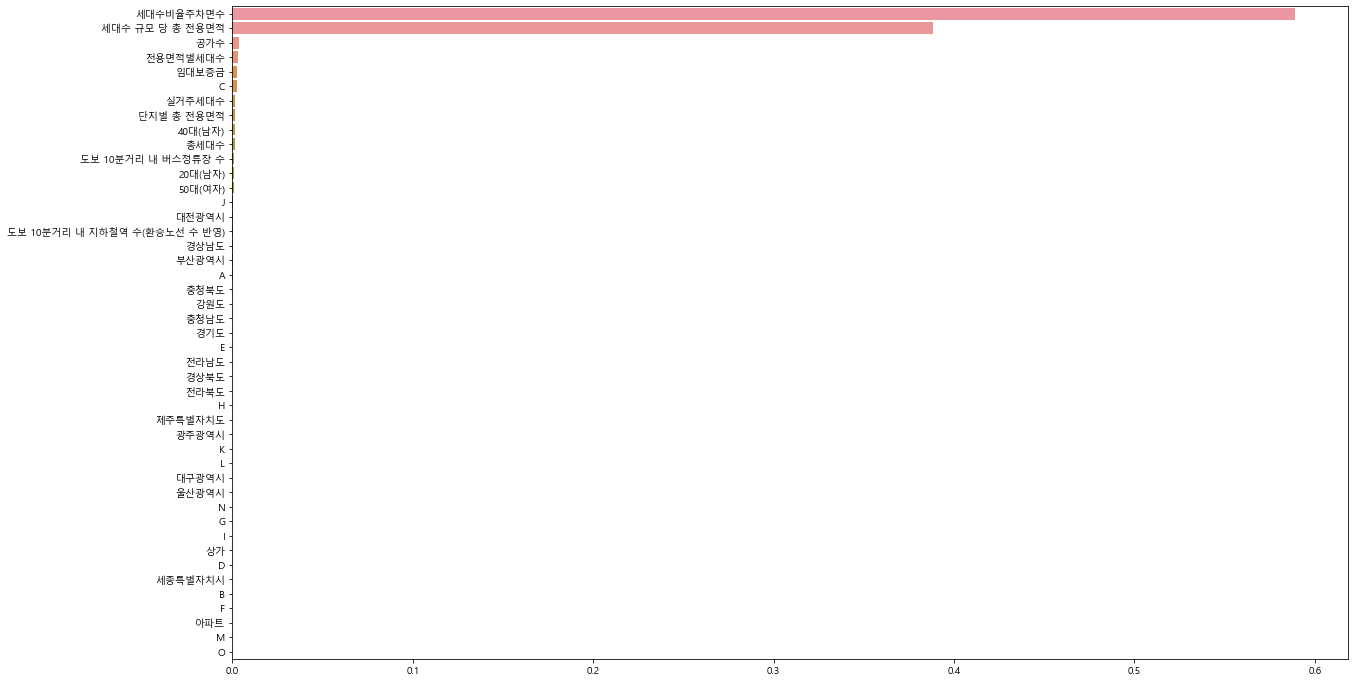

In [53]:
importance = model.feature_importances_
feature_importance = pd.Series(data=importance, index=X_train_df_sel.columns)
feature_importance = feature_importance.sort_values(ascending=False)

plt.figure(figsize=(20, 12))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.show()